## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Nombre y Apellido

***
## Ventanas


<div class="alert alert-block alert-info">
<b>1)</b> Implemente las funciones para generar las siguientes ventanas $w(k)$:

</div>

+ Bartlett ó triangular
+ Hann
+ Blackman
+ Flat-top



<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede consultar el capítulo 6.3 del libro de B. Porat para obtener las expresiones analíticas de cada ventana.

</div>

   a) Para cada ventana grafique $w(k)$ y el módulo de su espectro $ \lvert W(\Omega) \rvert $


<div class="alert alert-block alert-warning">
<img src="./ojo.svg" align="left" width="50" />  Normalice la amplitud máxima de todas las ventanas a 0 dB.
</div>

In [2]:
## Inicialización del Notebook del TP2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML

N  = 1000 # muestras
fs = 1000 # Hz


# Insertar aquí el código para inicializar tu notebook
########################################################



pos_om0 = 4220


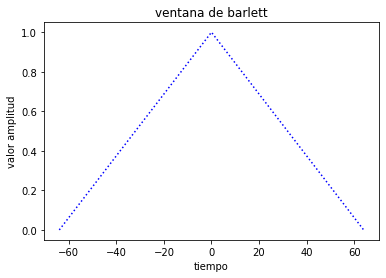

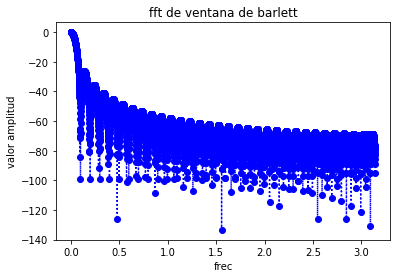

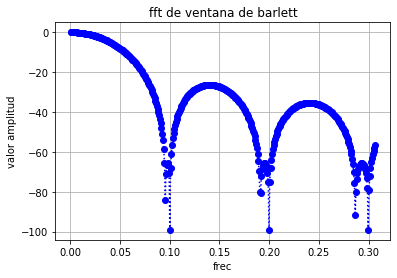

pos_om0 = 4222


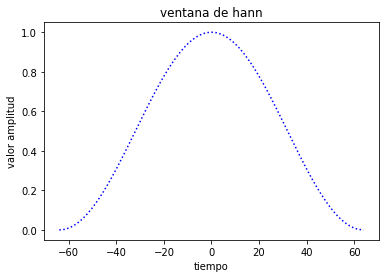

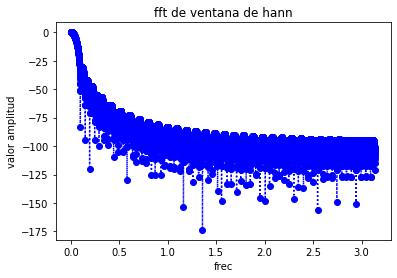

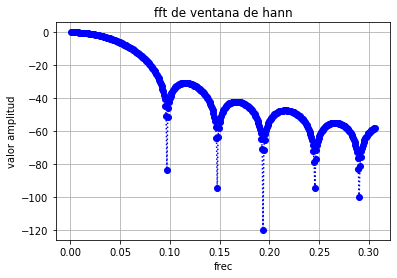

pos_om0 = 4270


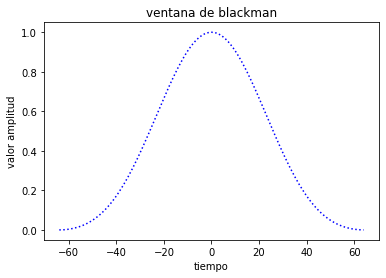

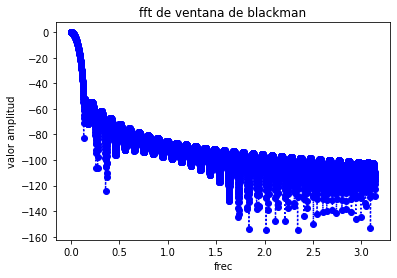

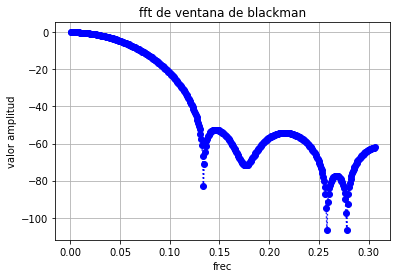

pos_om0 = 4411


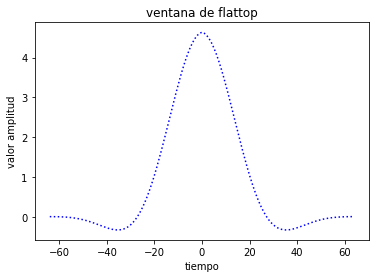

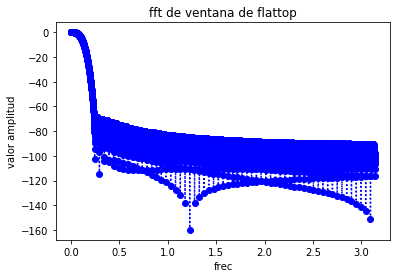

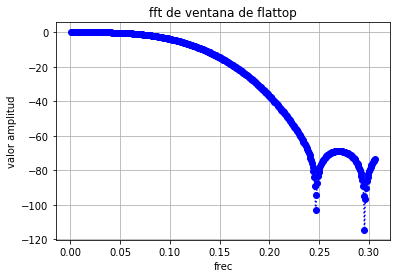

In [6]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
windows= {'bartlett':[0.0,0.0,0.0],         #'windows':[bw_1,bw_2,max_lobulo]
          'hann':[0.0,0.0,0.0],
          'blackman':[0.0,0.0,0.0],
          'flattop':[0.0,0.0,0.0]}





def fft_calc_de_ventana(w,nombre):
    M=8192
    fft_w_1=np.fft.fft(w,M)      #zero-padding para aumentar la resolucion espectral
    fft_w_2=np.fft.fftshift(fft_w_1)

    fft_w_3=fft_w_2/np.amax(fft_w_2) + np.nextafter(0,1)
    fft_w=20*np.log10(np.abs(fft_w_3))
    mu=np.linspace(-np.pi,np.pi,M)
    

    #calculo de lobulo principal (BW) 
    dft_abs=np.abs(fft_w_3)
    abs_om1=(2**(1/2))/2
    e_p=0.0001
    pos_1=0
    pos_2=0
    for ii in range(int(M/2)):
        if abs_om1 - dft_abs[ii] < e_p :
            pos_1=ii
            break
    for ii in range(int(M/2),M):
        if dft_abs[ii] - abs_om1 < e_p :
            pos_2=ii
            break
        
    #Determinacion de omega 0 (primer cruce por cero) 
    pos_om0=0
    for ii in range(int(M/2),M):
        if dft_abs[ii] < 0.0002 :
            pos_om0=ii
            break
    print('pos_om0 =',pos_om0)
    #Calculo del maximo del lobulo  secundario
    
    max_lobulo=20*np.log10(np.amax(dft_abs[pos_om0:M])/np.amax(dft_abs))
            
    
    


    plt.figure()
    plt.plot(n, w,':r',color = 'blue') 
    plt.title("ventana de "+nombre) 
    plt.xlabel('tiempo') 
    plt.ylabel("valor amplitud")

    plt.figure()
    plt.plot(mu[int(M/2):], fft_w[int(M/2):],':o',color = 'blue') 
    plt.title("fft de ventana de "+nombre) 
    plt.xlabel('frec') 
    plt.ylabel("valor amplitud")
    
    plt.figure()
    plt.plot(mu[int(M/2):int(M/2)+400], fft_w[int(M/2):int(M/2)+400],':o',color = 'blue') 
    plt.title("fft de ventana de "+nombre) 
    plt.xlabel('frec') 
    plt.ylabel("valor amplitud")

    plt.grid()
    plt.show()
    return [mu[pos_1],mu[pos_2],max_lobulo]



N=int(128)
n=np.linspace(-N/2,N/2,num=N,dtype=int)
n1=np.linspace(0,(N-1),N,dtype=int)


w_barlett=1.0-np.abs(n)/(N/2)


#bw_1,bw_2,max_lobulo = fft_calc_de_ventana(w_barlett,nombre)
windows['bartlett']=fft_calc_de_ventana(w_barlett,'barlett')

#bw=bw_2-bw_1

w_hann=np.cos((n/N)*np.pi)**2


windows['hann']=fft_calc_de_ventana(w_hann,'hann')

w_blackman=0.42+0.5*np.cos((2*np.pi/N)*n)+0.08*np.cos((2*np.pi/N)*2*n)


windows['blackman']=fft_calc_de_ventana(w_blackman,'blackman')

w_flattop=1-1.93*np.cos((2*np.pi*n1)/(N-1))+1.29*np.cos((4*np.pi*n1)/(N-1))-0.388*np.cos((6*np.pi*n1)/(N-1))+0.032*np.cos((8*np.pi*n1)/(N-1))

windows['flattop']=fft_calc_de_ventana(w_flattop,'flattop')




b) Construya una tabla en la que figure la anchura normalizada del lóbulo principal  de la ventana, $\Omega_1$, siendo 

$$ \lvert W(\Omega_1) \rvert = \frac{\sqrt{2}}{2}$$ 

y el valor de transferencia máxima de los lóbulos secundarios expresado en dB 

$$ W_2 = \mathop{max} \{\lvert W(\Omega) \rvert\} ,\space\space \forall \space \Omega \geq \Omega_0 $$

siendo $\Omega_0$ la frecuencia del primer cruce por cero $\lvert W(\Omega) \rvert\ = 0$ ó la frecuencia límite superior del lóbulo principal. Utilice como norma de frecuencia la frecuencia de Nyquist, de manera que las mediciones de frecuencias sean adimensionales y comparables independientemente de la frecuencia de muestreo.

In [9]:

#######################################
# Tu simulación que genere resultados #
#######################################

#los valores de f1 estan calibrados en radianes!!!!!!!!!!!!!!!!!!!!!!!!

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   [windows['bartlett'][1]-windows['bartlett'][0], windows['bartlett'][2]], # <-- acá debería haber numeritos :)
                   [windows['hann'][1]-windows['hann'][0], windows['hann'][2]], # <-- acá debería haber numeritos :)
                   [windows['blackman'][1]-windows['blackman'][0], windows['blackman'][2]], # <-- acá debería haber numeritos :)
                   [windows['flattop'][1]-windows['flattop'][0], windows['flattop'][2]] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$f_1$ (#)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())

    



,$f_1$ (#),$W_2$ (dB)
Rectangular,,
Bartlett,0.0621338,-26.4412
Hann,0.0698046,-30.8328
Blackman,0.0805438,-52.5531
Flat-top,0.184867,-68.836


<div class="alert alert-block alert-info">
<b>2)</b> Genere una señal bitonal de las siguientes características
</div>


  $  x(k) = x_1(k) + x_2(k) $

  $  x_1(k) = sen(\Omega_1·k)$

  $  x_2(k) = a_2 · sen(\Omega_2·k)   $

siendo 

  $\Omega_1 = \frac{\pi}{2}$

  $\Omega_2 = \Omega_1 + 10·\frac{2\pi}{N}$

  $a_2 = -40$ dB


Responda a las siguientes consignas:

<div class="alert alert-block alert-info">
<b>2.a)</b>  Calcule el espectro $ \lvert X(\Omega) \rvert $

</div>

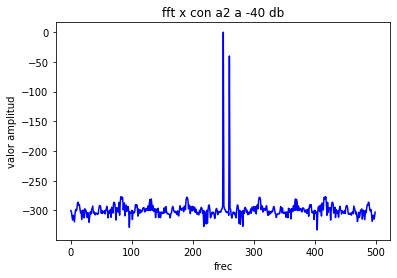

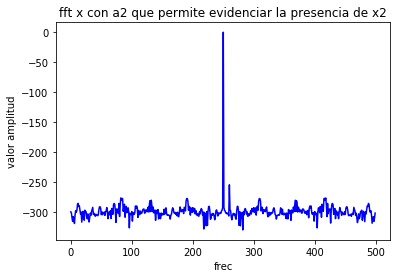

In [4]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
import numpy as np
import matplotlib.pyplot as plt

N=1000

fs=N
ts=1/fs
f0=fs/4
delta_f=fs/(N)


a2_db=[-40,-40-215]   #a2_db = 40-215 se empieza a notar 
a2=[0.0,0.0]

k=np.linspace(0,(N-1)*2*np.pi*ts,N)
ff=np.linspace (0,(N-1)*delta_f, N)
#om1_1=2*np.pi
om2=f0+10*delta_f
a2_test=['con a2 a -40 db','con a2 que permite evidenciar la presencia de x2']

for ii in range(2):
    a2[ii]=10**(a2_db[ii]/20)
    x1=np.sin(f0*k)
    x2=(a2[ii])*np.sin(om2*k)
    
    x=x1+x2
    
    
    fft=20*np.log10(2/N*np.abs(np.fft.fft(x)))
    
    fft_def=fft[:int((N)/2)]
    ff_1=ff[:int((N)/2)]
    
    plt.figure()
    plt.plot(ff_1, fft_def,'-b') 
    plt.title("fft x " + a2_test[ii]) 
    plt.xlabel('frec') 
    plt.ylabel("valor amplitud")
    plt.show()
    
    
    


<div class="alert alert-block alert-info">
<b>2.b)</b> Repita a) disminuyendo la amplitud de $x_2$.
</div>

¿Cuál es el factor de escala mínimo de $x_2$, definido como $a^0_2$, que permite evidenciar su existencia en el espectro de $\lvert X(\Omega) \rvert$ ?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b>El factor es aproximadamente -255 db
</div>


¿De qué depende poder medir $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Depende del piso de ruido que en este caso esta dado por el minimo valor que el sistema computacional es capas de representar numericamente expresado en db(-300 db aproximadamente).Por lo tanto el segundo tono tiene que tener una amplitid suficientemente grande para poder distinguirse del piso de ruido. 
</div>




Considere ahora que esta señal proviene de un ADC de 16 bits. Incorpore al análisis el correspondiente ruido de cuantización. ¿Cómo afecta esta situación la medición de $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Al considerar que la señal proviene de un ADC ,la señal contiene ruido de cuantizacion el cual es funcion del numero de bits del conversor .Con un ADC de 16 bits el error de cuantizacion es tal que el piso de ruido aumenta considerablemente (-125 db aproximadamente).por lo tanto el segundo tono tiene que tener una amplitud bastante mayor respecto al primer caso ,x2 debe tener una amplitud de -105 db para distinguirlo del piso de ruido.
Ademas se puede comprobar que si el ADC es de 64 bits el piso de ruido es el mismo que el caso original ,por lo que podemos afirmar que el sistema computacional es de 64 bits.   
 
</div>


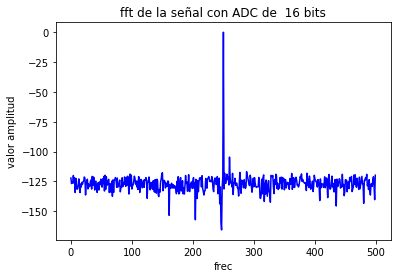

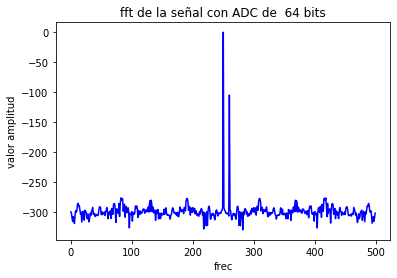

In [5]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
import numpy as np
import matplotlib.pyplot as plt

N=1000

fs=N
ts=1/fs
f0=fs/4
delta_f=fs/(N)


a2_db=-105  #a2_db = 40-215 se empieza a notar 
nb=[16,64]

k=np.linspace(0,(N-1)*ts*2*np.pi,N)
ff=np.linspace (0,(N-1)*delta_f, N)
#om1_1=2*np.pi
om2=f0+10*delta_f




for ii in range(2):
    nn=(2**(nb[ii]-1)-1)
    q=1/nn
    a2=10**(a2_db/20)
    x1=np.sin(f0*k)
    x2=a2*np.sin(om2*k)
    
    x=x1+x2
    eq=np.random.uniform(-q/2,q/2,1000)

    xt=x+eq
    fft=20*np.log10((2/N)*np.abs(np.fft.fft(xt)))
   
    fft_def=fft[:int((N)/2)]
    ff_1=ff[:int((N)/2)]

    plt.figure()
    plt.plot(ff_1, fft_def,'-b') 
    plt.title("fft de la señal con ADC de  " + str(nb[ii])+" bits") 
    plt.xlabel('frec') 
    plt.ylabel("valor amplitud")
   

    plt.show()
    
    


<div class="alert alert-block alert-info">
<b>2.c)</b> Repita a) incrementando la frecuencia de $x_1$ para $\Omega_1 = \frac{\pi}{2} + d_1·\frac{2\pi}{N}$ para valores de $d_1 = (0,01; 0.25; 0.5)$. Aumente la amplitud de $a_2$ hasta que se evidencie sobre el leakage y construya una tabla con dicho valor para las 3 situaciones correspondientes a desintonías leve, moderada y máxima.
</div>

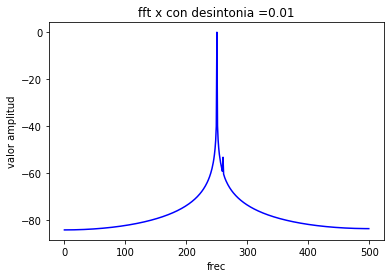

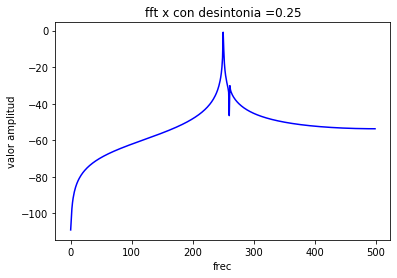

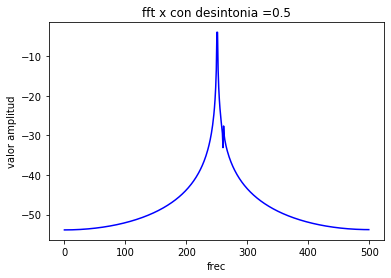

,$a_2$ (dB)
leve,-50
moderada,-30
máxima,-35


In [7]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



#######################################
# Tu simulación que genere resultados #
#######################################
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML
d=[0.01,0.25,0.5]



def funcion(des,a2_db):
    N=1000
    fs=N
    ts=1/fs
    f0=fs/4
    delta_f=fs/(N)
    
#    a2_db=-40+a2_ad
    a2=10**(a2_db/20)
    
    k=np.linspace(0,(N-1)*ts*2*np.pi,N)
    ff=np.linspace (0,(N-1)*delta_f, N)
    
    om1_1=f0+des*delta_f
#    om2=om1_1+4*10*2*np.pi/N
    
    x1=np.sin(om1_1*k)
    x2=a2*np.sin((om1_1+10*delta_f)*k)
    
    x=x1+x2
    
    fft=20*np.log10(2/N*np.abs(np.fft.fft(x)))
    
    fft_def=fft[:int((N)/2)]
    ff_1=ff[:int((N)/2)]
    
    plt.figure()

    plt.plot(ff_1, fft_def,'-b') 
    plt.title("fft x con desintonia =" + str(des)) 
    plt.xlabel('frec') 
    plt.ylabel("valor amplitud")
    
    plt.show()
    
 

funcion(d[0],-50)
funcion(d[1],-30)
funcion(d[2],-35)

#Con d=0.01 a2_db=-50db se nota sobre leakage
#Con d=0.25 a2_db=-30db se nota sobre leakage
#Con d=0.5 a2_db=-35db se nota sobre leakage

tus_resultados = [ 
                   -50, # <-- acá debería haber numeritos :)
                   -30, # <-- acá debería haber numeritos :)
                   -35 # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a_2$ (dB)'],
               index=[  
                        'leve',
                        'moderada',
                        'máxima',
                     ])
HTML(df.to_html())




<div class="alert alert-block alert-info">
<b>2.d)</b> Evalúe el efecto de utilizar las ventanas implementadas en 1). Complete la tabla comparativa con respecto a la ventana rectangular, respecto a las mediciones $a^0_2$ realizada en 2.b); y $a^1_2$ en 2.c) para el caso de desintonía máxima.
</div>

Grafique $\lvert X_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w(k) \} \rvert $ para las 4 ventanas de 1).

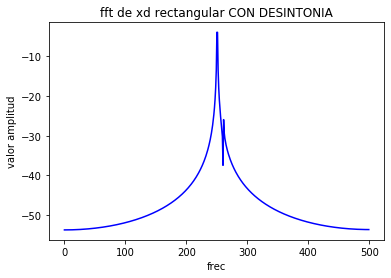

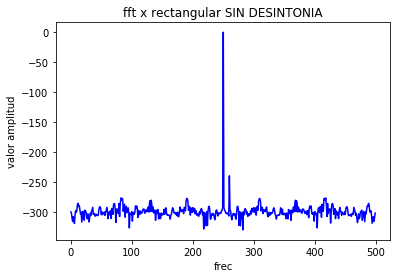

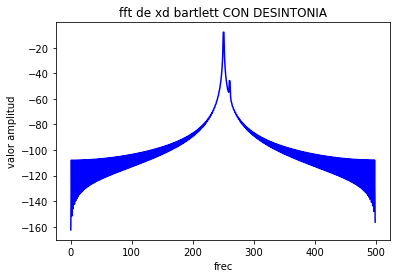

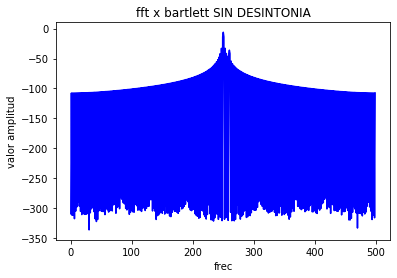

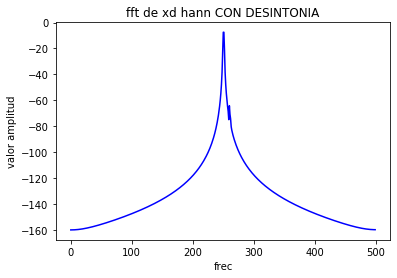

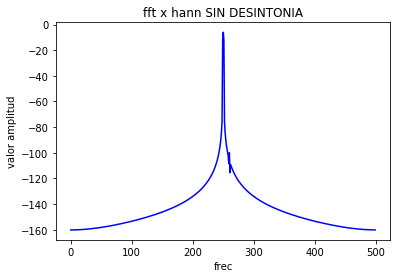

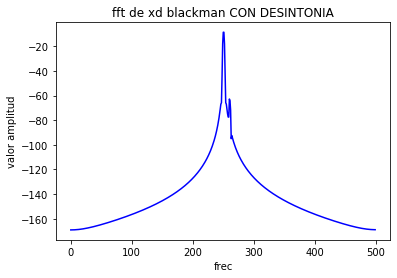

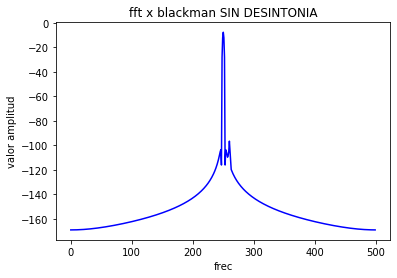

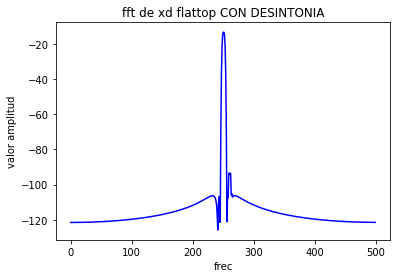

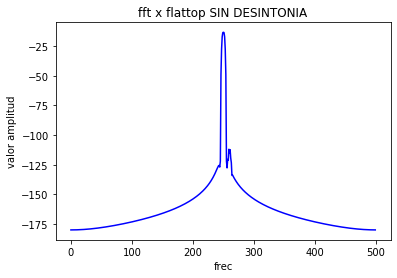

In [8]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML
from scipy import signal
windows=['rectangular','bartlett','hann','blackman','flattop']


def funcion(window,a0_2_db,a1_2_db):
    N=1000
    fs=N
    ts=1/fs
    f0=fs/4
    delta_f=fs/(N)
    
    
    k=np.linspace(0,(N-1)*ts*2*np.pi,N)
    ff=np.linspace (0,(N-1)*delta_f, N)
    d=[0.0,0.5]  #desintonia
    
    if(window=='rectangular'):
        w=np.ones(N)
    elif (window=='bartlett'):
        w=np.bartlett(N)
    elif(window=='hann'):
        w=np.hanning(N)
    elif(window=='blackman'):
        w=np.blackman(N)
    elif(window=='flattop'):
        w=signal.flattop(N)
    else:
        w=np.zeros(N)
    
    '''SIN DESINTONIA'''

#    a2_db=-40+a0_2_db
    a2=10**(a0_2_db/20)
    om1_1=f0+d[0]*delta_f
    om2=om1_1+10*delta_f
    
    x1=np.sin(om1_1*k)
    x2=a2*np.sin(om2*k)
    x=(x1+x2)*w

    fft=20*np.log10(2/(N)*np.abs(np.fft.fft(x)))
    fft_def=fft[:int((N)/2)]
    ff_1=ff[:int((N)/2)]

    '''CON DESINTONIA'''
#    a2_db=-40+a1_2_db
    a2_d=10**(a1_2_db/20)
    
    om1_1=f0+d[1]*delta_f
    om2=om1_1+10*delta_f
    
    x1=np.sin(om1_1*k)
    x2=a2_d*np.sin(om2*k)
    
    xd=(x1+x2)*w
    
    fft_d=20*np.log10(2/(N)*np.abs(np.fft.fft(xd)))
    fft_def_d=fft_d[:int((N)/2)]
    ff_1=ff[:int((N)/2)]


    plt.figure()
    #plt.subplot(3,1,1)
    plt.plot(ff_1, fft_def_d,'-b') 
    plt.title("fft de xd "+ window +" CON DESINTONIA") 
    plt.xlabel('frec') 
    plt.ylabel("valor amplitud")
    
    plt.figure()
    #plt.subplot(3,1,1)
    plt.plot(ff_1, fft_def,'-b') 
    plt.title("fft x "+ window +" SIN DESINTONIA") 
    plt.xlabel('frec') 
    plt.ylabel("valor amplitud")

    plt.show()
    
    
#for w in windows:
#    funcion(w)

'''a0_2_db sin desintonia,a1_2_db con desintonia'''
funcion(windows[0],-240,-30)
funcion(windows[1],-30,-40)
funcion(windows[2],-100,-60)
funcion(windows[3],-90,-55)
funcion(windows[4],-100,-80)


#rectangular a0_2_db=-240 sin desintonia,a1_2_db=-30 con desintonia  
#bartlett a0_2_db=-30 sin desintonia,a1_2_db=-40 con desintonia
#hann a0_2_db=-100 sin desintonia,a1_2_db=-60 con desintonia
#blackman a0_2_db=-90 sin desintonia,a1_2_db=-55 con desintonia
#flattop a0_2_db=-100 sin desintonia,a1_2_db=-80 con desintonia



In [13]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   [-240, -30], # <-- acá debería haber numeritos :)
                   [-30, -40], # <-- acá debería haber numeritos :)
                   [-100, -60], # <-- acá debería haber numeritos :)
                   [-90, -55], # <-- acá debería haber numeritos :)
                   [-100, -80] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a^0_2$ (dB)','$a^1_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())



,$a^0_2$ (dB),$a^1_2$ (dB)
Rectangular,-240,-30
Bartlett,-30,-40
Hann,-100,-60
Blackman,-90,-55
Flat-top,-100,-80


<div class="alert alert-block alert-info">
<b>2.e)</b> Para las ventanas analizadas en 1), decida cuál sería la más apropiada en el caso que, <b>sin afectar otro parámetro</b>, $\Omega_2$ pudiera acercarse libremente a $\Omega_1 = \frac{\pi}{2} + 0.5·\frac{2\pi}{N}$. Complete la siguiente tabla con la distancia mínima, $\Omega_0, $ a la que se puede distinguir $x_2$ en $\lvert X_w(\Omega) \rvert$.
</div>

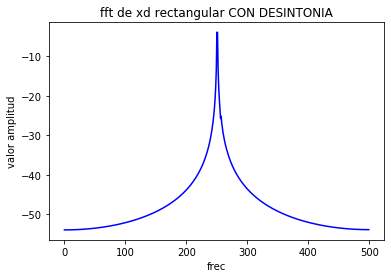

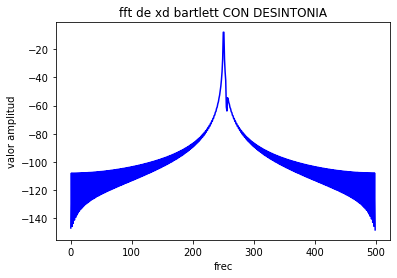

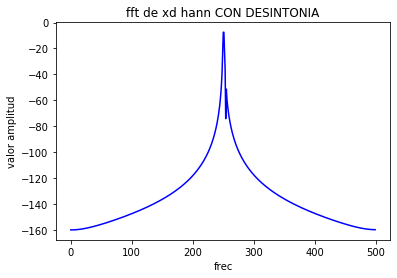

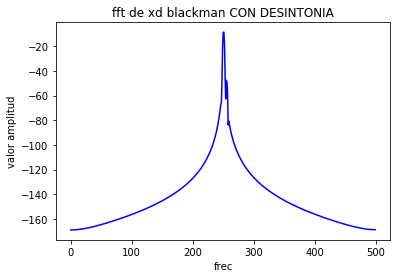

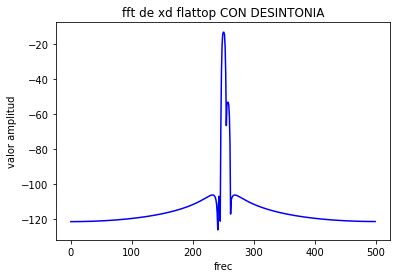

,$\Omega_0$ (#)
Rectangular,6
Bartlett,5
Hann,3
Blackman,5
Flat-top,7


In [9]:

#######################################
# Tu simulación que genere resultados #
#######################################
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

windows=['rectangular','bartlett','hann','blackman','flattop']


def funcion(window,om_min):
    N=1000
    fs=N
    ts=1/fs
    f0=fs/4
    delta_f=fs/(N)
    
    
    k=np.linspace(0,(N-1)*ts*2*np.pi,N)
    ff=np.linspace (0,(N-1)*delta_f, N)
    d=0.5 #desintonia
    
    if(window=='rectangular'):
        w=np.ones(N)
    elif (window=='bartlett'):
        w=np.bartlett(N)
    elif(window=='hann'):
        w=np.hanning(N)
    elif(window=='blackman'):
        w=np.blackman(N)
    elif(window=='flattop'):
        w=signal.flattop(N)
    else:
        w=np.zeros(N)
    


    '''CON DESINTONIA'''
#    a2_db=-40+a1_2_db
    a1_2_db=-40
    a2_d=10**(a1_2_db/20)
    
    om1_1=f0+d*delta_f
    om2=om1_1+om_min*delta_f
    
    x1=np.sin(om1_1*k)
    x2=a2_d*np.sin(om2*k)
    
    xd=(x1+x2)*w
    
    fft_d=20*np.log10(2/(N)*np.abs(np.fft.fft(xd)))
    fft_def_d=fft_d[:int((N)/2)]
    ff_1=ff[:int((N)/2)]


    plt.figure()
    #plt.subplot(3,1,1)
    plt.plot(ff_1, fft_def_d,'-b') 
    plt.title("fft de xd "+ window +" CON DESINTONIA") 
    plt.xlabel('frec') 
    plt.ylabel("valor amplitud")
    

    plt.show()
    
    
    
#for w in windows:
#    funcion(w)

'''om_min esta espresado en (om_min*2*pi)/N (bins) y lo hice probando valor por valor y muy a ojo '''

funcion(windows[0],6)    #Ventana rectangular
funcion(windows[1],5)    #Ventana bartlett
funcion(windows[2],3)    #Ventana hann
funcion(windows[3],5)    #Ventana blackman
funcion(windows[4],7)    #Ventana flattop


tus_resultados = [ 
                   6, # <-- acá debería haber numeritos :)
                   5, # <-- acá debería haber numeritos :)
                   3, # <-- acá debería haber numeritos :)
                   5, # <-- acá debería haber numeritos :)
                   7 # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\Omega_0$ (#)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())





<div class="alert alert-block alert-info">
<b>3)</b> Genere la siguiente señal 

</div>

  $  x(k) = a_0·\mathop{sen}(\Omega_1·k)$


siendo 

  $a_0 = 2$

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y la variable aleatoria definida por

  $f_r \sim \mathcal{U}(-2, \, 2) $

Considere 200 realizaciones para cada experimento requerido en los siguiente incisos.


<div class="alert alert-block alert-info">
<b>3.a)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

 
  $ \hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$
  
siendo

  $\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert $ 
  
para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

El sesgo y la varianza se definen para este caso como

  $ s_a = \mathop{E}\{ \hat{a_0}\} - a_0  $
    
  $ v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \} $
  
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales ($a=a_0$ para simplificar la notación)

  $ \mathop{E}\{ \hat{a_0}\}  = \hat{\mu_a} =  \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}} $
  
  $ s_a = \hat{\mu_a} - a  $
    
  $ v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2 $



Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

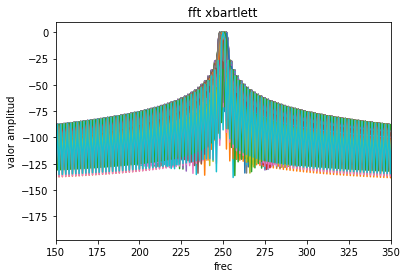

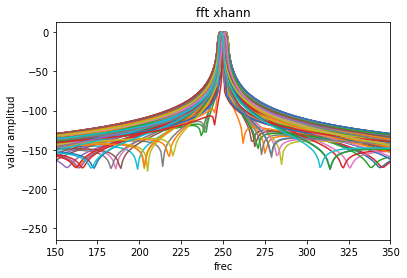

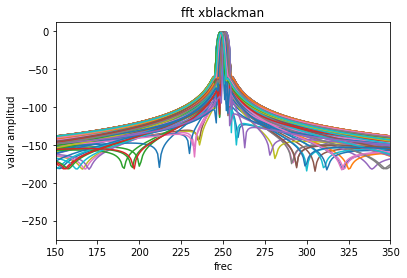

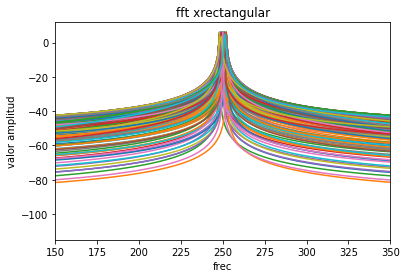

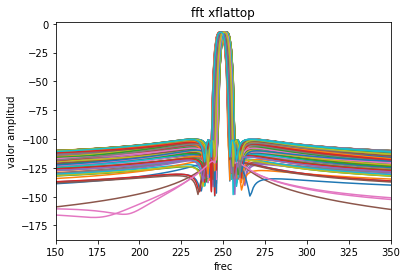

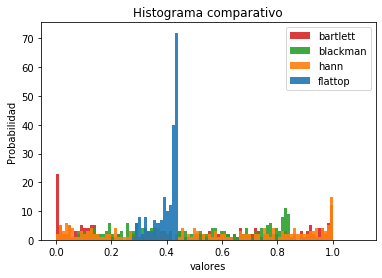

In [12]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

ventanas ={}

def funcion(vent):
    N=1000
    
    fs=N
    
    f0=fs/4
    
    a0 = 2
    
    Ts=1/fs
    
    delta_f=fs/N
    
    M= 200    #realizaciones
    
    k = np.linspace(0,(N-1)*Ts*2*np.pi,N)
    
    ff=np.linspace (0,(N-1)*delta_f, N)
    
    

    fr =np.random.uniform(-2,2,M)

    omega_1 =(f0 +fr*delta_f)
    

    
    if (vent=='bartlett'):
        w=np.bartlett(N)
    elif(vent=='hann'):
        w=np.hanning(N)
    elif(vent=='blackman'):
        w=np.blackman(N)
    elif(vent=='flattop'):
        w=signal.flattop(N)
    elif(vent=='rectangular'):
        w=np.ones(N)
    else :
        w=np.zeros(N)
    
        
    x=[a0*np.sin(omega_1[ii]*k)*w for ii in range(M)]
    

    x2=np.reshape(x,(M,N))
    
    x3=(2/N)*np.abs(np.fft.fft(x2))
    
    x4=[x3[ii][250] for ii in range(200)]
    
    fft=20*np.log10(x3) 

    fft_def=fft[:int(N/2)]
    ff_1=ff[:int(N/2)]
    
    plt.figure()
    for jj in range(M):
        plt.plot(ff_1, fft[jj,:500],) 
    plt.title("fft x"+vent) 
    plt.xlabel('frec') 
    plt.ylabel("valor amplitud")
    plt.xlim([150,350])

    plt.show()
    
    x_om0=np.hstack(x4)
    
    return x_om0

def funcion2(x_om0):

    M=200
    m=0
    
    for ii in range(M):
        m += (1/M)*x_om0[ii]
    
    var=0
    
    for ii in range(M):
        var +=(1/M)*(x_om0[ii]-m)**2
    
    return m,var


x_om0_bartlett= funcion('bartlett')

med_bartlett,var_bartlett=funcion2(x_om0_bartlett)

sa_bartlett=med_bartlett-2

x_om0_hann= funcion('hann')

med_hann,var_hann=funcion2(x_om0_hann)

sa_hann=med_hann-2

x_om0_blackman= funcion('blackman')

med_blackman,var_blackman=funcion2(x_om0_blackman)

sa_blackman=med_blackman-2

x_om0_rectangular= funcion('rectangular')

med_rect,var_rect=funcion2(x_om0_rectangular)

sa_rectangular=med_rect-2

x_om0_flattop= funcion('flattop')

med_flattop,var_flattop=funcion2(x_om0_flattop)

sa_flattop=med_flattop-2

plt.figure()
plt.title("Histograma comparativo") 
plt.xlabel('valores') 
plt.ylabel("Probabilidad")
n,bins,patches=plt.hist([x_om0_flattop,x_om0_hann,x_om0_blackman,x_om0_bartlett],bins=100,alpha=0.9,range=(0.0,1.1),histtype='stepfilled',label=['flattop','hann','blackman','bartlett'])
plt.legend(loc='upper right')
plt.show()








In [18]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   [sa_rectangular, var_rect], # <-- acá debería haber numeritos :)
                   [sa_bartlett, var_bartlett], # <-- acá debería haber numeritos :)
                   [sa_hann, var_hann], # <-- acá debería haber numeritos :)
                   [sa_blackman, var_blackman], # <-- acá debería haber numeritos :)
                   [sa_flattop, var_flattop], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())





,$s_a$,$v_a$
Rectangular,-1.216042,0.443672
Bartlett,-1.562036,0.124716
Hann,-1.476367,0.113825
Blackman,-1.523422,0.063204
Flat-top,-1.602844,0.001872


<div class="alert alert-block alert-info">
<b>3.b)</b> Repita a) para el siguiente estimador:
</div>

 
  $ \hat{a_1} = \sqrt{\frac{1}{5}·\sum_{j=a}^{b} \lvert X^i_w(j) \rvert ^2} $
  
siendo $ a = \Omega_0 - 2·\frac{2\pi}{N} $ y $ b = \Omega_0 + 2·\frac{2\pi}{N} $

para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

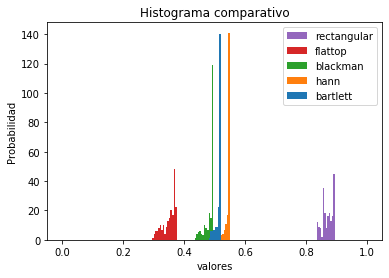

In [11]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
ventanas ={}

def funcion(vent):
    N=1000
    
    fs=N
    
    f0=fs/4
    
    a0 = 2
    
    Ts=1/fs
    
    delta_f=fs/N
    
    M= 200    #realizaciones
    
    k = np.linspace(0,(N-1)*Ts*2*np.pi,N)
    
    ff=np.linspace (0,(N-1)*delta_f, N)
    
    

    fr =np.random.uniform(-2,2,M)

    omega_1 =(f0 +fr*delta_f)
    
    w=np.zeros(N)
    
    x=np.zeros((M,N))
    x3=np.zeros((M,5))
    
    if (vent=='bartlett'):
        w=np.bartlett(N)
    elif(vent=='hann'):
        w=np.hanning(N)
    elif(vent=='blackman'):
        w=np.blackman(N)
    elif(vent=='flattop'):
        w=signal.flattop(N)
    elif(vent=='rectangular'):
        w=np.ones(N)
    else :
        w=np.zeros(N)
    
        
    x=[a0*np.sin(omega_1[ii]*k)*w for ii in range(M)]
    
    
    
    x2=[(2/N)*np.abs(np.fft.fft(x[ii])) for ii in range(M)]
    
    for jj in range(-2,3):
        x3[:,jj+2]=[x2[ii][250+jj] for ii in range(200)]   #nos quedamos solo con omega0
        

    
    return x,x2,x3

def funcion2(om0):
    
    x_om0=np.zeros(200)
    for ii in range(200):
        for jj in range(5):
            x_om0[ii] += om0[ii,jj]**2
        x_om0[ii]=((1/5)*x_om0[ii])**(1/2)
    M=200
    m=0
    #Caluculo de la media
    for ii in range(M):
        m += (1/M)*x_om0[ii]
    
    var=0
    #calculo de la varianza
    for ii in range(M):
        var +=(1/M)*(x_om0[ii]-m)**2
    
    return m,var,x_om0




x,x1,x_om0_b= funcion('bartlett')
med_bartlett,var_bartlett,x_om0_bartlett=funcion2(x_om0_b)

x,x2,x_om0_h= funcion('hann')
med_hann,var_hann,x_om0_hann=funcion2(x_om0_h)

x,x2,x_om0_bl= funcion('blackman')
med_blackman,var_blackman,x_om0_blackman=funcion2(x_om0_bl)

x,x2,x_om0_flt= funcion('flattop')
med_flattop,var_flattop,x_om0_flattop=funcion2(x_om0_flt)

x,x2,x_om0_rect= funcion('rectangular')
med_rect,var_rect,x_om0_rect=funcion2(x_om0_rect)




plt.figure()
plt.title("Histograma comparativo") 
plt.xlabel('valores') 
plt.ylabel("Probabilidad")
n,bins,patches=plt.hist([x_om0_bartlett,x_om0_hann,x_om0_blackman,x_om0_flattop,x_om0_rect],bins=200,range=(0.0,1.0),histtype='stepfilled',label=['bartlett','hann','blackman','flattop','rectangular'])
plt.legend(loc='upper right')
plt.show()




In [21]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   [med_rect-2, var_rect], # <-- acá debería haber numeritos :)
                   [med_bartlett-2, var_bartlett], # <-- acá debería haber numeritos :)
                   [med_hann-2, var_hann], # <-- acá debería haber numeritos :)
                   [med_blackman-2, var_blackman], # <-- acá debería haber numeritos :)
                   [med_flattop-2, var_flattop], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())




,$s_a$,$v_a$
Rectangular,-1.128999,0.000281
Bartlett,-1.487160,0.000036
Hann,-1.458425,0.000115
Blackman,-1.514445,0.000185
Flat-top,-1.653515,0.000439
